# Выбор локации для скважины

## Описание проекта

Необходимо решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Цель проекта

Разработать модель, прогнозирующую наиболее прибильный, для бурения скважин, регион. Проанализировать возможные прибыль и риски.

## План работы

1. Загрузка данных.
2. Предварительная обработка.
3. Подготовка данных к машинному обучению.
4. Обчение моделей.
5. Рассчет прибыли для лучших скважин региона.
6. Рассчет рисков и прибыли по регионам.

## Описание данных

Данные геологоразведки трёх регионов находятся в файлах: 
- /datasets/geo_data_0.csv. 
- /datasets/geo_data_1.csv. 
- /datasets/geo_data_2.csv. 
-  id — уникальный идентификатор скважины;
-  f0, f1, f2 — три признака точек;
-  product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

### Настройка окружения

In [1]:
# основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# подготовка к машинному обучению
from sklearn.model_selection import train_test_split

# модели машинного обучения
from sklearn.linear_model import LinearRegression

# метрики машинного обучения
from sklearn.metrics import mean_squared_error

### Загрузка данных

In [2]:
# загрузим предоставленные датасеты
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

### Изучение данных

In [3]:
# напишем функцию для изучения общих сведений по датафреймам
def data_exam(df):
    df.info()
    print('*' * 70)
    print('Размерность таблицы:' + '\n', df.shape)
    print('*' * 70)
    display(df.head())
    print('*' * 70)
    print('Количество пропусков:' + '\n', df.isna().sum())
    print('*' * 70)
    print('Названия столбцов:' + '\n', df.columns)
    print('*' * 70)
    print('Количество явных дубликатов:' + '\n', df.duplicated().sum())
    print('*' * 70)
    print('Количество неявных дубликатов:' + '\n', df.duplicated(subset=['id']).sum())
    print('*' * 70)

In [4]:
# выведем информацию по Региону 1
print('Сводные данные по датафрейму geo_data_0')
print('*' * 70)
data_exam(geo_data_0)

Сводные данные по датафрейму geo_data_0
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
**********************************************************************
Размерность таблицы:
 (100000, 5)
**********************************************************************


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


**********************************************************************
Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
**********************************************************************
Названия столбцов:
 Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')
**********************************************************************
Количество явных дубликатов:
 0
**********************************************************************
Количество неявных дубликатов:
 10
**********************************************************************


In [5]:
# выведем информацию по Региону 2
print('Сводные данные по датафрейму geo_data_1')
print('*' * 70)
data_exam(geo_data_1)

Сводные данные по датафрейму geo_data_1
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
**********************************************************************
Размерность таблицы:
 (100000, 5)
**********************************************************************


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


**********************************************************************
Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
**********************************************************************
Названия столбцов:
 Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')
**********************************************************************
Количество явных дубликатов:
 0
**********************************************************************
Количество неявных дубликатов:
 4
**********************************************************************


In [6]:
# выведем информацию по Региону 3
print('Сводные данные по датафрейму geo_data_2')
print('*' * 70)
data_exam(geo_data_2)

Сводные данные по датафрейму geo_data_2
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
**********************************************************************
Размерность таблицы:
 (100000, 5)
**********************************************************************


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**********************************************************************
Количество пропусков:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
**********************************************************************
Названия столбцов:
 Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')
**********************************************************************
Количество явных дубликатов:
 0
**********************************************************************
Количество неявных дубликатов:
 4
**********************************************************************


Все датафреймы загрузились без ошибок, имеют одинаковую размерность - 5 столбцов и 100000 строк. Типы данных корректны, названия столбцов корректны. Пропуски данных и явные дубликаты отстуствуют. Во всех датафреймах есть неявные дубликаты, строки с одинаковыми id скважин. Далее изучим их подробней.

### Предварительная обработка данных

#### Работа с данными по целевому признаку

In [7]:
# оценим количество неявных дубликатов в Регионе 1
geo_data_0[geo_data_0.duplicated(subset=['id'], keep=False)].sort_values('id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Действительно, для одних и тех же скважин видим разные данные в других столбцах. В первую очередь нас интересуют данные об объеме запасов. Появление этих дубликатов могло возникунть вследствие переоценки запасов конркетной скважины службой геологоразведки и внесением дублирующей информации в базу данных. Так как на регион выделяется определенное количество финансирования, мы не можем завышать показатель срднего запаса нефти для конкретного региона, поэтому оставим в данных скважины с меньшим показателем запасов, из дублирующихся данных. Неявные дубликаты по остальным регионам, обработаем по такой же логике. Но вообще, необходимо уточнить у заказчика, какие данные нужно считать верными, по дублирующимся скважинам.

In [8]:
# скопирем датафреймы для последующей оценки процента удаленных данных
geo_data_0_old = geo_data_0.copy()
geo_data_1_old = geo_data_1.copy()
geo_data_2_old = geo_data_2.copy()

In [9]:
# напишем функцию для удаления неявных дубликатов с бОльшим значением в столбце product
def id_duplicate_processing(df):
    list_id = df[df.duplicated(subset=['id'])]['id']
    print('Неявные дубликаты скважин до преобразования:')
    print(df.loc[df['id'].isin(list_id)].sort_values(by='id'))
    indexes = df.groupby('id')['product'].idxmin()
    df = df.loc[indexes]
    print('*' * 70)
    print('После преобразования:')
    print(df.loc[df['id'].isin(list_id)].sort_values(by='id'))
    print('*' * 70)
    print('Размерность после удаления.')
    print(df.shape)
    return df

In [10]:
# проведем преобразование для Региона 1
print('Удаление неявных дубликатов в geo_data_0')
print('*' * 70)
geo_data_0 = id_duplicate_processing(geo_data_0)

Удаление неявных дубликатов в geo_data_0
**********************************************************************
Неявные дубликаты скважин до преобразования:
          id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
895

In [11]:
# проведем преобразование для Региона 2
print('Удаление неявных дубликатов в geo_data_1')
print('*' * 70)
geo_data_1 = id_duplicate_processing(geo_data_1)

Удаление неявных дубликатов в geo_data_1
**********************************************************************
Неявные дубликаты скважин до преобразования:
          id         f0         f1        f2     product
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305
**********************************************************************
После преобразования:
          id        f0         f1        f2    product
5849   5ltQ6 -3.435401 -12.296043  1.999796  57.085625
41906  LHZR0 -8.989672  -4.286607  2.009139  57.085625
82178  bfPNe -6.202799  -4.820045  2.995107  84.038886
47591  wt4Uk -9.0

In [12]:
# проведем преобразование для Региона 3
print('Удаление неявных дубликатов в geo_data_2')
print('*' * 70)
geo_data_2 = id_duplicate_processing(geo_data_2)

Удаление неявных дубликатов в geo_data_2
**********************************************************************
Неявные дубликаты скважин до преобразования:
          id        f0        f1        f2     product
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641
**********************************************************************
После преобразования:
          id        f0        f1        f2     product
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
28039  xCHr8  1.633027  0.368135 -2

Таким образом, видим, что преобразование прошло успешно - удалены дублирующиеся скважины с бОльшим значением в столбце продукт, для каждого региона.

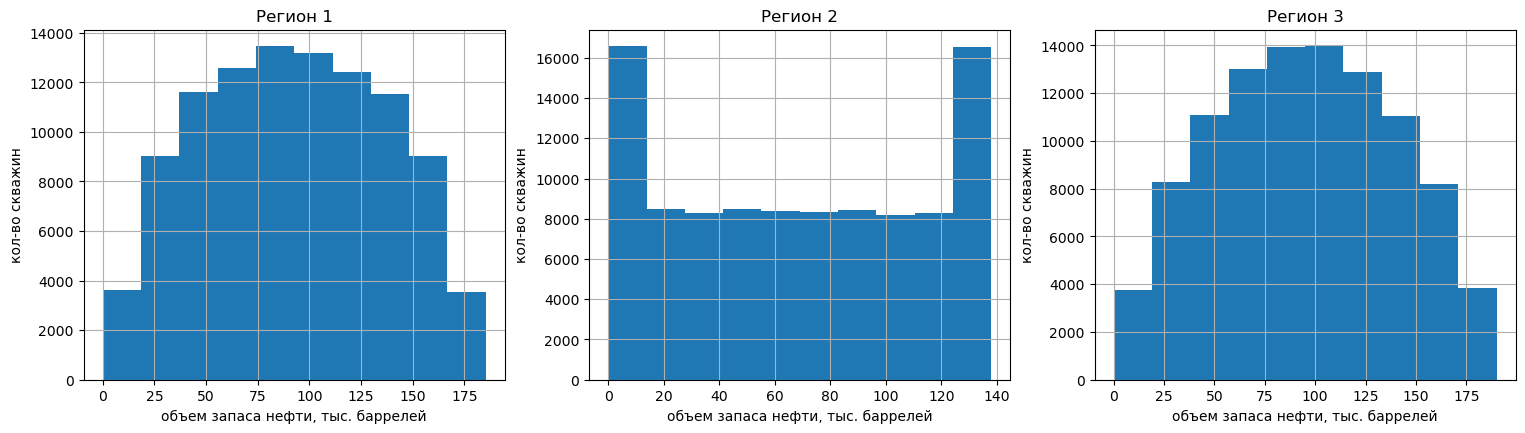

In [13]:
# посмотрим распределение данных по каждому региону для целевого столбца
dict_geo = {'Регион 1':geo_data_0, 'Регион 2':geo_data_1, 'Регион 3':geo_data_2}
i = 1
for df_name, df in dict_geo.items():
    ax = plt.subplot(2, 4, i)
    df['product'].hist(ax=ax, figsize=(25,10));
    plt.xlabel('объем запаса нефти, тыс. баррелей')
    plt.ylabel('кол-во скважин');
    plt.title(df_name)
    i += 1

Видим, что для Региона 1 и Региона 2 - распределния данных по целевому столбцу product, близки к нормальным, возможно имеются нулевые значения запаса нефти в скважине. 

Для Региона 2 распределение данных имеет необычную, симметричную структуру. Возможно, что при выгрузке данных по Региону 2 были технические сбои и данные выгрузились некорреткно или были утеряны, либо данный набор является синтетическим и предоставлен заказчиком, в качестве проверочного для оценки нашей работы.

In [14]:
# напишем функцию для оценки чесленной статистики по целевому столбцу
def evaluation_of_product(df):
    print(df['product'].describe())
    print('*' * 70)
    print('Количество скважин с нулевыми запасами:', df.loc[df['product'] == 0]['product'].count())
    df.boxplot(column='product')
    plt.ylabel('объем запаса нефти, тыс. баррелей')

Численная статистика для Региона 1
**********************************************************************
count    99990.000000
mean        92.497431
std         44.289177
min          0.000000
25%         56.495873
50%         91.842960
75%        128.562225
max        185.364347
Name: product, dtype: float64
**********************************************************************
Количество скважин с нулевыми запасами: 1


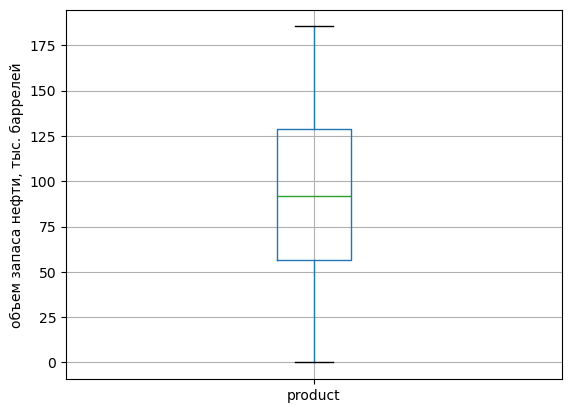

In [15]:
# проведем оценку Региона 1
print('Численная статистика для Региона 1')
print('*' * 70)
evaluation_of_product(geo_data_0)

Видим, что в данных отстутсвуют выбросы, среднее и медианные значения практически одинаковы. Пристутсвует одно нулевое значение.

Численная статистика для Региона 2
**********************************************************************
count    99996.000000
mean        68.823409
std         45.944494
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64
**********************************************************************
Количество скважин с нулевыми запасами: 8235


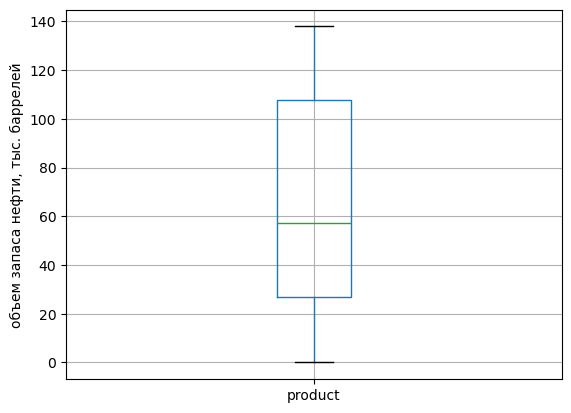

In [16]:
# проведем оценку Региона 2
print('Численная статистика для Региона 2')
print('*' * 70)
evaluation_of_product(geo_data_1)

Видим, что в данных отстутсвуют выбросы, среднее и медианные значения отличаются: 57 и 69, соответственно. Пристутсвует 8235 скважин с нулевыми запасами нефти.

Численная статистика для Региона 3
**********************************************************************
count    99996.000000
mean        94.997431
std         44.748717
min          0.000000
25%         59.450028
50%         94.917850
75%        130.585544
max        190.029838
Name: product, dtype: float64
**********************************************************************
Количество скважин с нулевыми запасами: 1


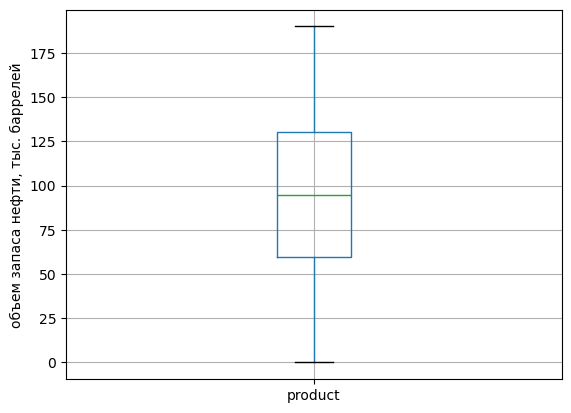

In [17]:
# проведем оценку Региона 3
print('Численная статистика для Региона 3')
print('*' * 70)
evaluation_of_product(geo_data_2)

Видим, что в данных отстутсвуют выбросы, среднее и медианные значения практически одинаковы. Пристутсвует одно нулевое значение.

In [18]:
geo_data_0_dz = geo_data_0.copy()
geo_data_1_dz = geo_data_1.copy()
geo_data_2_dz = geo_data_2.copy()

#### Работа с данными по остальным признакам

In [19]:
# напишем функцию построения боксплотов для признаков f0, f1 и f2
def boxplot_visual(df):
    list_features = ['f0', 'f1', 'f2']
    i = 1
    plt.figure(figsize=(16, 8))
    for feature in list_features:
        ax = plt.subplot(1, 3, i)
        df.boxplot(column=feature,ax=ax)
        plt.ylabel('значение признака');
        i += 1

Выбросы в признаках для Региона 1


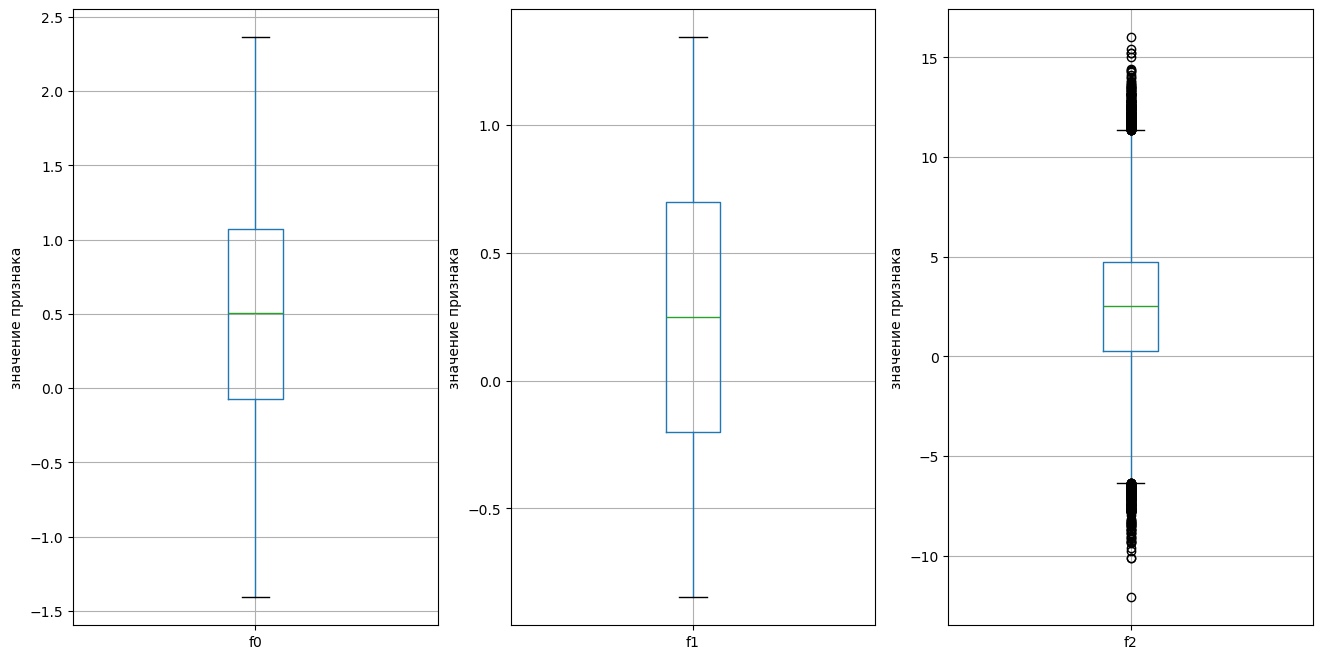

In [20]:
# построим боксплоты для Региона 1
print('Выбросы в признаках для Региона 1')
boxplot_visual(geo_data_0)

Наблюдаются выбросы для признака f2

Выбросы в признаках для Региона 2


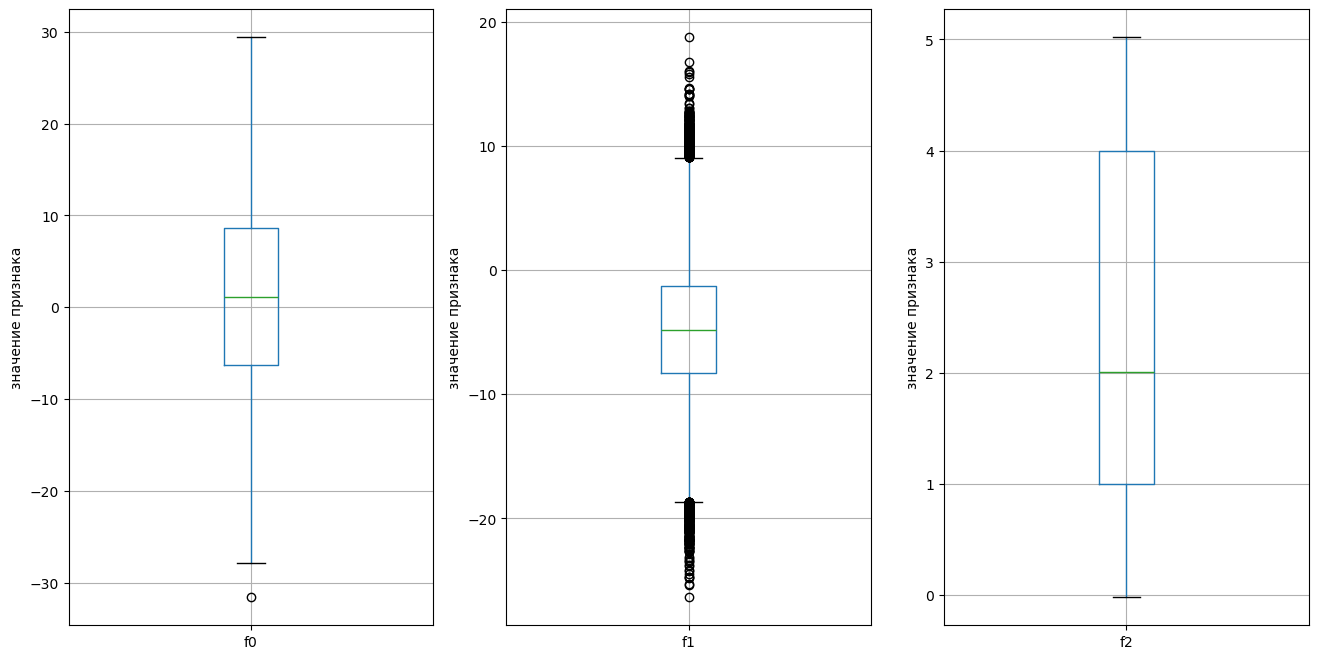

In [21]:
# построим боксплоты для Региона 2
print('Выбросы в признаках для Региона 2')
boxplot_visual(geo_data_1)

Наблюдаются выбросы для признаков f0 и f1

Выбросы в признаках для Региона 3


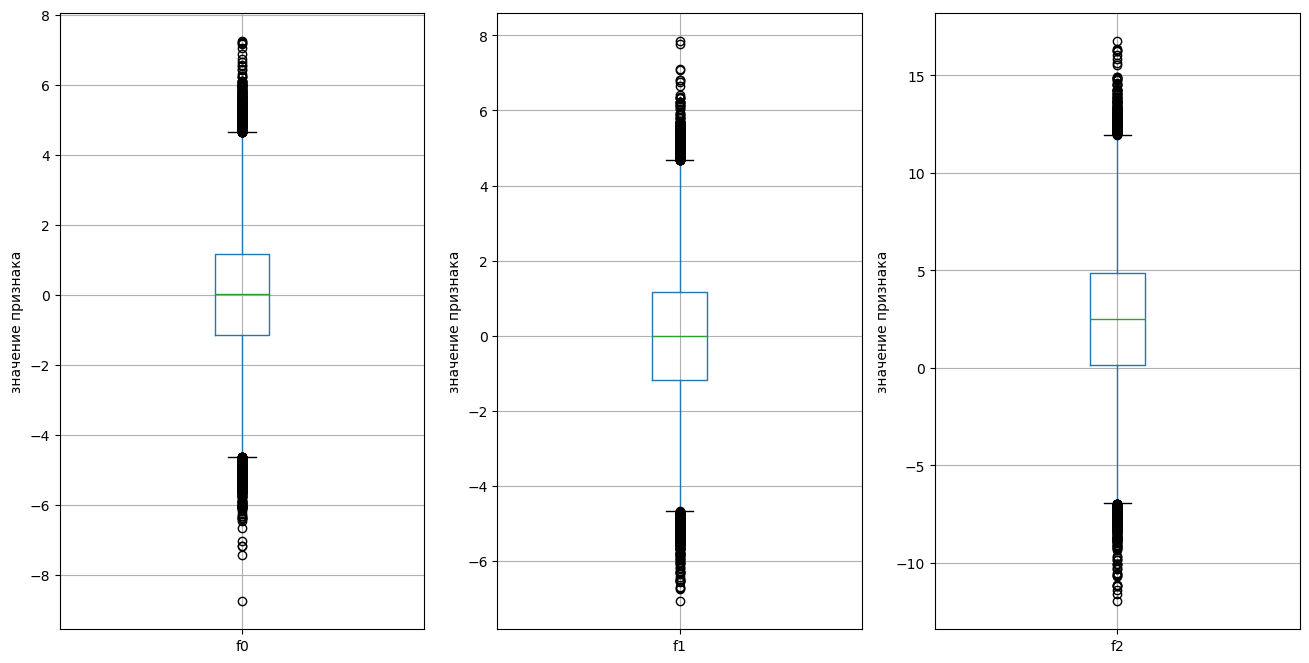

In [22]:
# построим боксплоты для Региона 3
print('Выбросы в признаках для Региона 3')
boxplot_visual(geo_data_2)

Наблюдаются выбросы для признаков f0, f1 и f2

Так как признаки у нас "обезличины", на текущем этапе исследования мы не сможем понять логику и природу их возниконовения, для обработки. Остается только запросить пояснения у заказчиков. На текущий момент выбросы не удаляем.

In [23]:
geo_data_0_do = geo_data_0.copy()
geo_data_1_do = geo_data_1.copy()
geo_data_2_do = geo_data_2.copy()

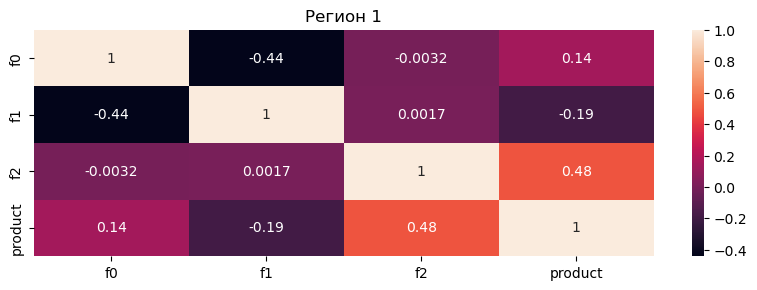

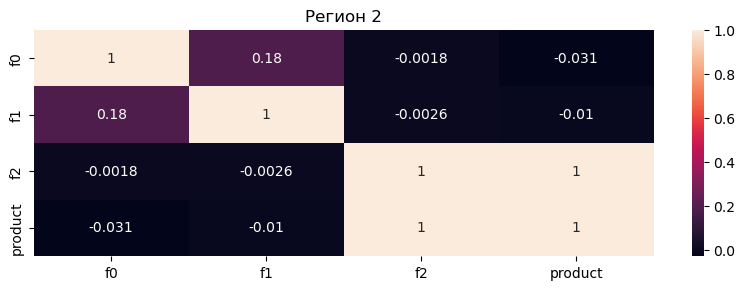

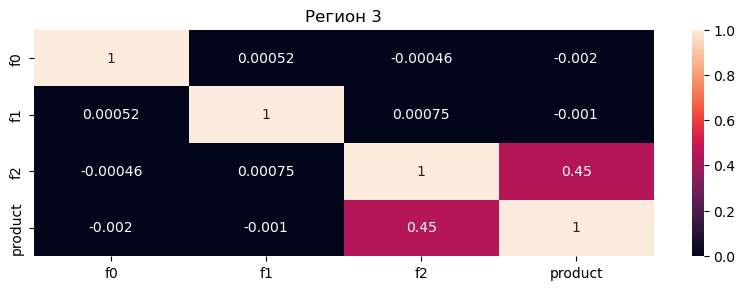

In [24]:
# оценим степень корреляции между признаками
dict_geo = {'Регион 1':geo_data_0, 'Регион 2':geo_data_1, 'Регион 3':geo_data_2}
i = 1

for df_name, df in dict_geo.items():
    plt.figure(figsize=(10,10))
    ax = plt.subplot(3, 1, i)
    sb.heatmap(df.corr(numeric_only=True),ax=ax, annot=True)
    plt.title(df_name)
    i += 1

Видим, что для Региона 2 признак f2 полностью коррелирует с целевым признаком product (коэффициент = 1). Наблюдаем мультиколлениарность признаков, что можно сравнить с утечкой целевого признака в обучающую выборку, это в свою очередь приведет к неверному обучению модели, статистические выводы такой модели могут быть крайне ненадежными. Но в ТЗ от заказчика, прямо указанно, что все факторы важны. Поэтому будем работать с теми данными, что есть - без изменений.

Для остальных регионов корреляция признаков находится на примелимом уровне.

### Выводы

-  Были загружены три датафрейма, предоставленные заказчиком. Все датафреймы загрузились без ошибок, имеют одинаковую размерность - 5 столбцов и 100000 строк. Типы данных корректны, названия столбцов корректны. Пропуски данных и явные дубликаты отстуствуют;


- В данных были обнаружены неявные дубликаты, в каждом из регионов. Для одних и тех же скважин дублировалась информация, были удалены дубликаты у которых значение запаса нефти в скважине имело максимальное значение;


- Для Региона 2 была обнаружена мультиколлениарность целевого признака product и признака f2 (коэффициент корреляции = 1);


## Обучение и проверка модели

### Создание выборок

In [25]:
# создадим функцию для создания обущающей и валидационной выборок 
def sample_split(data):
    target_data = data['product']
    features_data = data.drop(['product', 'id'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features_data,target_data, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [26]:
# проведем разбиение для Региона 1
features_train_0, features_valid_0, target_train_0, target_valid_0 = sample_split(geo_data_0)
features_train_0.shape, features_valid_0.shape, target_train_0.shape, target_valid_0.shape

((74992, 3), (24998, 3), (74992,), (24998,))

In [27]:
# проведем разбиение для Региона 2
features_train_1, features_valid_1, target_train_1, target_valid_1 = sample_split(geo_data_1)
features_train_1.shape, features_valid_1.shape, target_train_1.shape, target_valid_1.shape

((74997, 3), (24999, 3), (74997,), (24999,))

In [28]:
# проведем разбиение для Региона 3
features_train_2, features_valid_2, target_train_2, target_valid_2 = sample_split(geo_data_2)
features_train_2.shape, features_valid_2.shape, target_train_2.shape, target_valid_2.shape

((74997, 3), (24999, 3), (74997,), (24999,))

Выборки созданны корректно.

### Обучение модели и предсказание

In [29]:
# напишем функцию создания модели и получения результатов
def line_model(features_train, features_valid, target_train, target_valid): 
    # инициируем модели линейной регрессии
    model = LinearRegression()
    # обучим модель
    model.fit(features_train, target_train)
    # сделаем прогнозы
    predicted_valid = model.predict(features_valid)
    
    # посчитаем rmse
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    # посчитаем средний запас сырья
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid)

    return target_valid, predicted_valid, rmse, predicted_valid_mean

In [30]:
# Регион 1
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 =\
line_model(features_train_0, features_valid_0, target_train_0, target_valid_0)
print('Регион 1')
print('Реальный средний запас сырья:',geo_data_0['product'].mean() )
print('Предсказанный средний запас сырья:', predicted_valid_mean_0)
print('RMSE:', rmse_0)
print('*'*70)

# Регион 2
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 =\
line_model(features_train_1, features_valid_1, target_train_1, target_valid_1)
print('Регион 2')
print('Реальный средний запас сырья:',geo_data_1['product'].mean() )
print('Предсказанный средний запас сырья:', predicted_valid_mean_1)
print('RMSE:', rmse_1)
print('*'*70)

# Регион 3
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 =\
line_model(features_train_2, features_valid_2, target_train_2, target_valid_2)
print('Регион 3')
print('Реальный средний запас сырья:',geo_data_2['product'].mean() )
print('Предсказанный средний запас сырья:', predicted_valid_mean_2)
print('RMSE:', rmse_2)
print('*'*70)

Регион 1
Реальный средний запас сырья: 92.49743116975415
Предсказанный средний запас сырья: 92.45867727562879
RMSE: 37.703816170396195
**********************************************************************
Регион 2
Реальный средний запас сырья: 68.82340862355407
Предсказанный средний запас сырья: 68.9916720213159
RMSE: 0.8903351798664594
**********************************************************************
Регион 3
Реальный средний запас сырья: 94.99743084172428
Предсказанный средний запас сырья: 95.02041705325783
RMSE: 40.18231468759048
**********************************************************************


Видим, что предсказанные средние запасы сырья по регионам, близки к истинным средним запасам. Но при этом для регионов 1 и 3 метрика RMSE имеет большие значения. Эти факты говорят о том, что полученная модель является несмещенной, но, по-видимому имеет большой разброс. Наименьшая ошибка наблюдается для Региона 2, наибольший предсказанный средний запса сырья в Регионе 3.


In [31]:
total_info = pd.DataFrame([
                            [predicted_valid_mean_0, predicted_valid_mean_1, predicted_valid_mean_2],
                            [rmse_0, rmse_1, rmse_2]
                          ],
                          index=['Предсказанный средний запас сырья', 'RMSE'],
                          columns=['Регион 1', 'Регион 2', 'Регион 3'])

print('Итоговая информация')
total_info

Итоговая информация


,Регион 1,Регион 2,Регион 3
Предсказанный средний запас сырья,92.458677,68.991672,95.020417
RMSE,37.703816,0.890335,40.182315


## Подготовка к расчёту прибыли

In [32]:
#лучших скважин в р зададим константы и посчитаем окупаемость меторождений
OIL_PRICE = 450000 # цена нефти за 1 тыс баррелей

BUDGET_WORK = 10_000_000_000 # бюджет на разработку скважин в регионе

BEST_WELLS = 200 # по условию задачи мы выберм 200 лучших скважин

PAYBACK = (BUDGET_WORK/OIL_PRICE)/BEST_WELLS # значение когда наступает окупаемость для 200 егионе

RANDOM_WELLS = 500
BOOTSTRAP_SAMPLES = 1000
STATE = np.random.RandomState(12345)
print("Окупаемость месторождений в регионе в тыс баррелей:", PAYBACK)

Окупаемость месторождений в регионе в тыс баррелей: 111.11111111111111


Таким образом, минимальное среднее значение для запаса нефти в скважине, для того чтобы разработка окупалась в 0, равна 111.11 тыс. баррелей. Это больше, чем предсказанный средний запас для всех скважин в регионе разработки. Картина характерина для всех трех регионов. Далее проведем работу оценке прибыли для 200 лучших скважин, для каждого региона.

## Расчёт прибыли и рисков 

In [33]:
# создадим функцию для оценки прибыли по 200 лучшим скважинам
# функция отбирает лучшие скважины из реальных данных на основе предсказанных моделью
def revenue(target, predicted, count):
    target = pd.Series(target).reset_index(drop=True)
    predicted = pd.Series(predicted).reset_index(drop=True)
    predicted_sorted = predicted.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:count]
    return ((OIL_PRICE * selected.sum() - BUDGET_WORK)/1000000) 

In [34]:
# посмотрим, что получилось
print('Регион 1')
print('Прибыль с 200 лучших скважин региона, млн.руб.:',revenue(target_valid_0, predicted_valid_0, BEST_WELLS))
print('*'*70)

print('Регион 2')
print('Прибыль с 200 лучших скважин региона, млн.руб.:',revenue(target_valid_1, predicted_valid_1, BEST_WELLS))
print('*'*70)

print('Регион 3')
print('Прибыль с 200 лучших скважин региона, млн.руб.:',revenue(target_valid_2, predicted_valid_2, BEST_WELLS))
print('*'*70)

Регион 1
Прибыль с 200 лучших скважин региона, млн.руб.: 3333.746205374388
**********************************************************************
Регион 2
Прибыль с 200 лучших скважин региона, млн.руб.: 2415.086696681511
**********************************************************************
Регион 3
Прибыль с 200 лучших скважин региона, млн.руб.: 2689.88936218449
**********************************************************************


Таким образом, видим, что наибольшая прибыль по 200 лучшим скважинам прогнозируется в Регионе 1.


Теперь реализуем вариант по условиям задачи - в регионе выбирается 500 скважин, из которых выбирается 200 лучших. Применим технику Bootstrap c 1000 выборок. Доверительный интервал выберем в 95%

In [35]:
# создадим функцию расчета рисков и прибыли
def bootstrap (target, predicted):
    values = []
    for i in range(BOOTSTRAP_SAMPLES):
        target_subsample = target.reset_index(drop=True).sample(n=RANDOM_WELLS, replace=True, random_state=STATE)
        predicted_subsample = predicted[target_subsample.index]
        values.append(revenue(target_subsample, predicted_subsample, BEST_WELLS))

    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))
    
    print("Средняя прибыль, млн. руб.:", mean)
    print("Доверительный интервал - минимум, млн. руб.:", lower)
    print("Доверительный интервал - максимум, млн. руб.:", upper)
    print("Риски убытка в %:", 100 * (values < 0).mean())
    ax=values.plot(kind='hist', bins=10, grid=True)  
    ax.set_xlabel('Прибыль, млн. руб.', fontsize=10)
    ax.set_ylabel('частота')
    plt.show()

РЕГИОН 1
Средняя прибыль, млн. руб.: 423.5139706368861
Доверительный интервал - минимум, млн. руб.: -93.51511299508519
Доверительный интервал - максимум, млн. руб.: 929.4649446397433
Риски убытка в %: 4.9


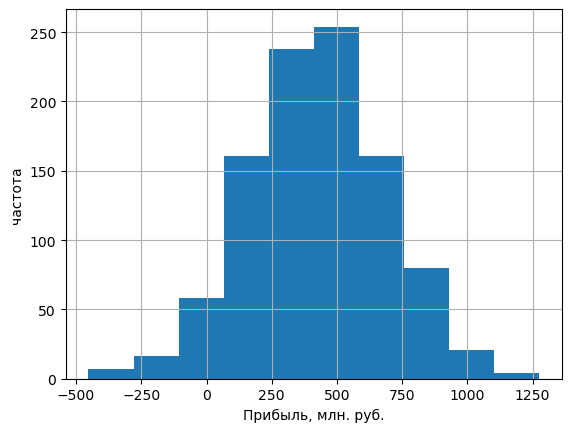

In [36]:
# проверим Регион 1
print('РЕГИОН 1')
bootstrap(target_valid_0, predicted_valid_0)

РЕГИОН 2
Средняя прибыль, млн. руб.: 464.36091247961076
Доверительный интервал - минимум, млн. руб.: 41.71833321316953
Доверительный интервал - максимум, млн. руб.: 928.6630739947309
Риски убытка в %: 1.3


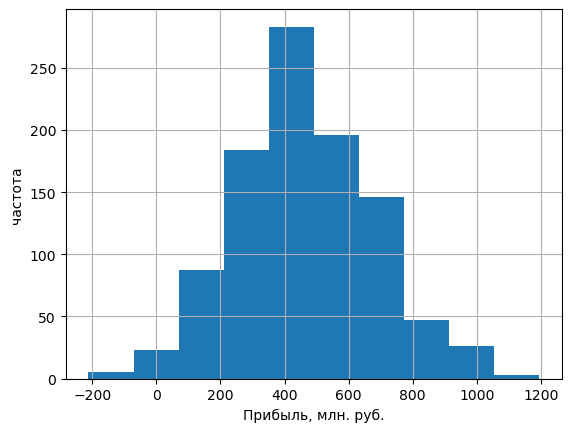

In [37]:
# проверим Регион 2
print('РЕГИОН 2')
bootstrap(target_valid_1, predicted_valid_1)

РЕГИОН 3`
Средняя прибыль, млн. руб.: 325.5185378031319
Доверительный интервал - минимум, млн. руб.: -173.31813600712113
Доверительный интервал - максимум, млн. руб.: 884.0089764352347
Риски убытка в %: 10.6


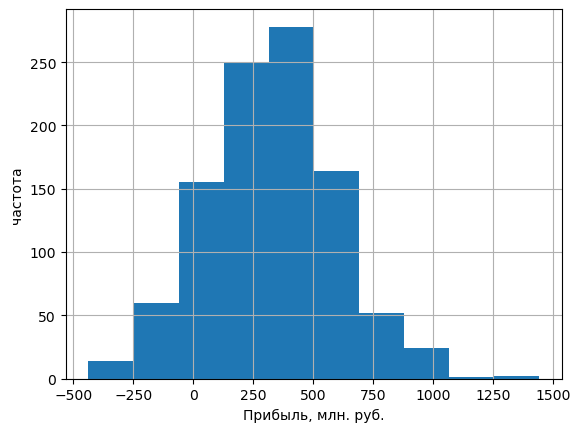

In [38]:
# проверим Регион 3
print('РЕГИОН 3`')
bootstrap(target_valid_2, predicted_valid_2)

### Выводы

Таким образом можно сделать следующие выводы:
- Регион 2 потнециально прибылен, прогнозируемая прибыль самая большая из всех представленных регионов, вероятность получения убытков менее 1.3%, нижняя граница доверительного интервала имеет положительное значение;
- Оставшиеся Регион 1 и Регион 3 потенциально прибыльны, но вероятность получения убытков больше 2.5%, нижние границы доверительного интервала имеют отрицательные значения;
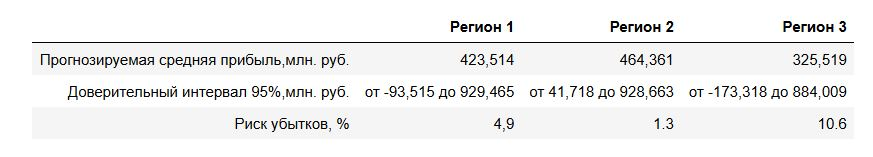


Таким образом, для разработки рекомендован Регион 2.

## Итоговый вывод

-  Были загружены три датафрейма, предоставленные заказчиком. Все датафреймы загрузились без ошибок, имеют одинаковую размерность - 5 столбцов и 100000 строк. Типы данных корректны, названия столбцов корректны. Пропуски данных и явные дубликаты отстуствуют;


- В данных были обнаружены неявные дубликаты, в каждом из регионов. Для одних и тех же скважин дублировалась информация, были удалены дубликаты у которых значение запаса нефти в скважине имело максимальное значение;

- Для Региона 2 была обнаружена мультиколлениарность целевого признака product и признака f2 (коэффициент корреляции = 1);

________________________________________________________________________________________________________________________________

- Данные разбиты на выборки в соотношении 75/20 (обущающая/валидационная);


- Обчена модель линейной регрессии и сделаны предсказания:

  - Регион 1: RMSE модели линейной регрессии на валидационной выборке: 37.7. Cредний запас предсказанного сырья: 92.5 тыс. баррелей;

  - Регион 2: RMSE модели линейной регрессии на валидационной выборке: 0.89. Cредний запас предсказанного сырья: 68.99 тыс. баррелей;

  - Регион 3: RMSE модели линейной регрессии на валидационной выборке: 40.1 Cредний запас предсказанного сырья: 95 тыс. баррелей. баррелей.
  
  
- Определено, минимальное среднее значение для запаса нефти в скважине, для того чтобы разработка окупалась в 0, равна 111.11 тыс. баррелей. Это больше, чем предсказанный средний запас для всех скважин в регионе разработки. Картина характерина для всех трех регионов;


- Провден расчет прогноза прибыли по 200 лучшим скважинам. Определено, что наибольшая прибыль по 200 лучшим скважинам прогнозируется в Регионе 1;


- Реализованы условия реальной задачи - в регионе выбирается 500 скважин, из которых выбирается 200 лучших. Применена техника Bootstrap c 1000 выборками. Доверительный интервал выберан в 95%:
  -  Регион 2 потнециально прибылен, прогнозируемая прибыль самая большая из всех представленных регионов, вероятность получения убытков менее 2.5%, нижняя граница доверительного интервала имеет положительное значение;
  - Оставшиеся Регион 1 и Регион 3 потенциально прибыльны, но вероятность получения убытков больше 2.5%, нижние границы доверительного интервала имеют отрицательные значения;

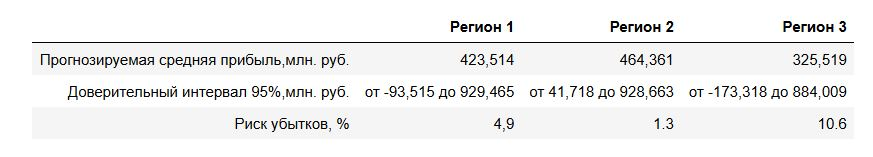
________________________________________________________________________________________________________________________________

**По результатм исследования к разработке рекомендован Регион 2**